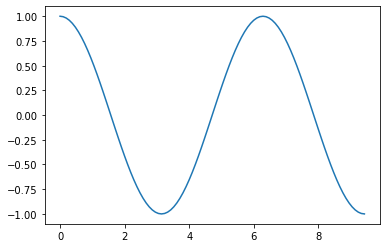

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, np.pi*3, num=100)
y = np.cos(x)

plt.plot(x, y)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

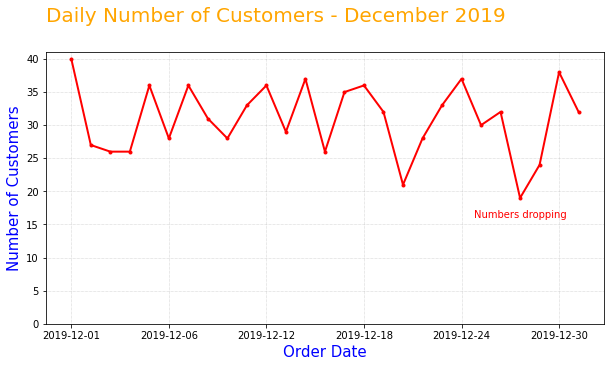

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

fig = plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.text(0.72,0.42, 'Numbers dropping', transform=fig.transFigure, color='')
plt.show()



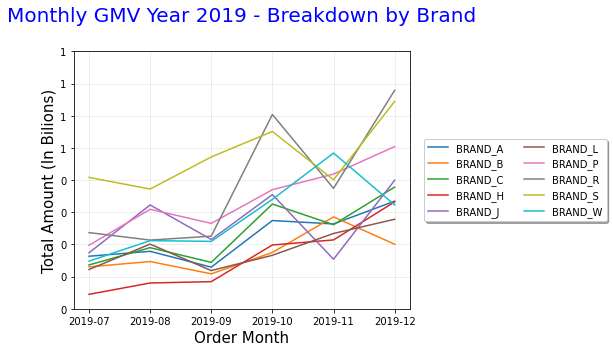

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (In Bilions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

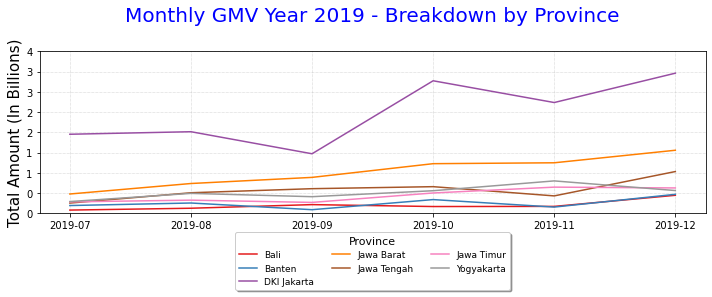

In [ ]:
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (In Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [ ]:
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


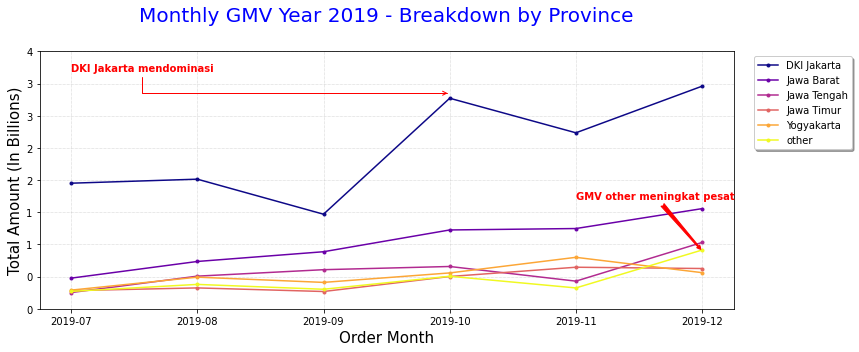

In [ ]:
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (In Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			xytext=(4, 1700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
						   connectionstyle='arc3',
						   color='red'))
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0, 3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->',
						   connectionstyle='angle',
						   color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

   order_id  order_date  customer_id  ... order_month      gmv province_top
0   1703458  2019-10-17        14004  ...     2019-10  7400000  DKI Jakarta
1   1706815  2019-10-24        17220  ...     2019-10  1208000  DKI Jakarta
2   1710718  2019-11-03        16518  ...     2019-11  8360000  DKI Jakarta
4   1702573  2019-10-16        15696  ...     2019-10  8950000  DKI Jakarta
6   1711399  2019-11-04        16791  ...     2019-11  1465000  DKI Jakarta

[5 rows x 12 columns]


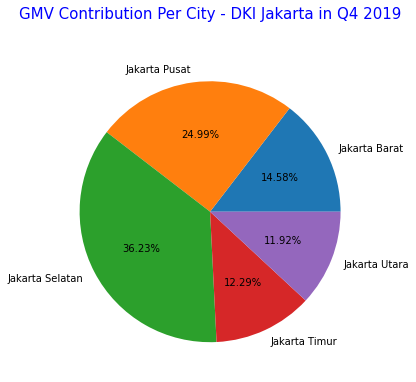

In [ ]:
import matplotlib.pyplot as plt

dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

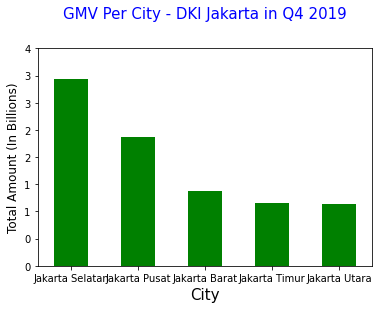

In [ ]:
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (In Billions)', fontsize=12)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

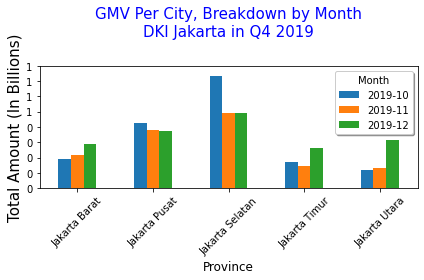

In [ ]:
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (In Billions)', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

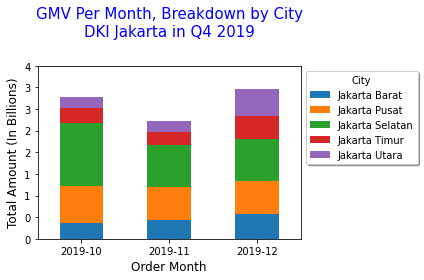

In [ ]:
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (In Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

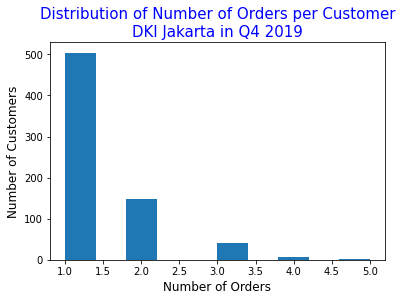

In [ ]:
plt.clf()
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

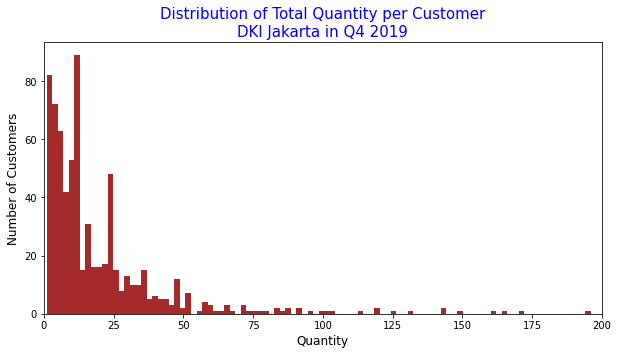

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

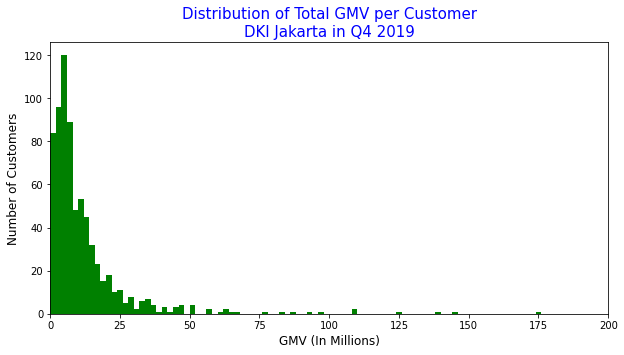

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (In Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

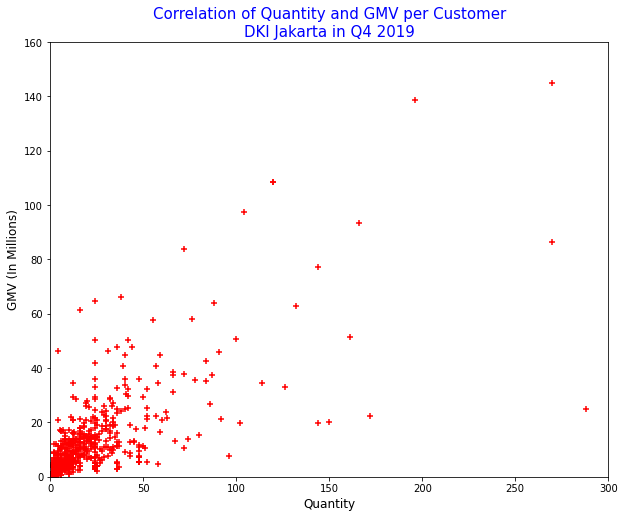

In [ ]:
plt.clf()
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (In Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


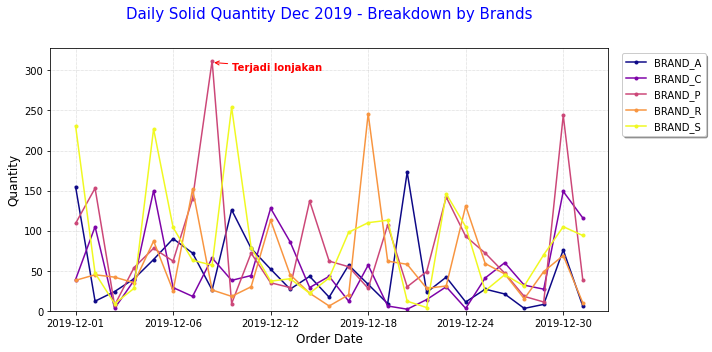

In [ ]:
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Solid Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

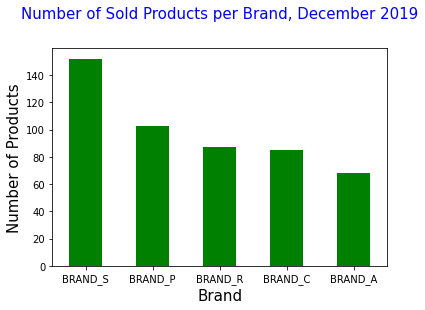

In [ ]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

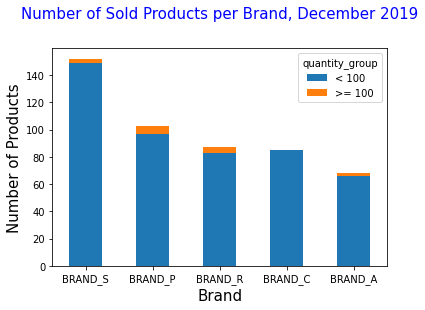

In [ ]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

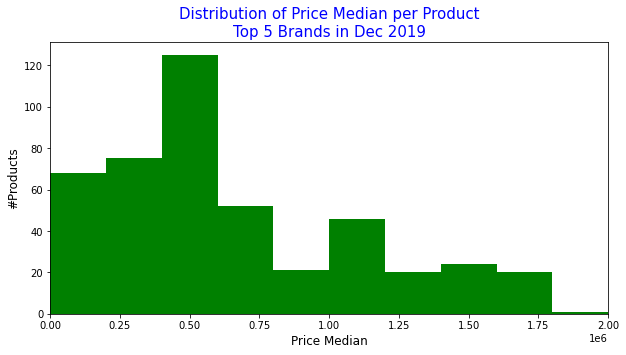

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('#Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

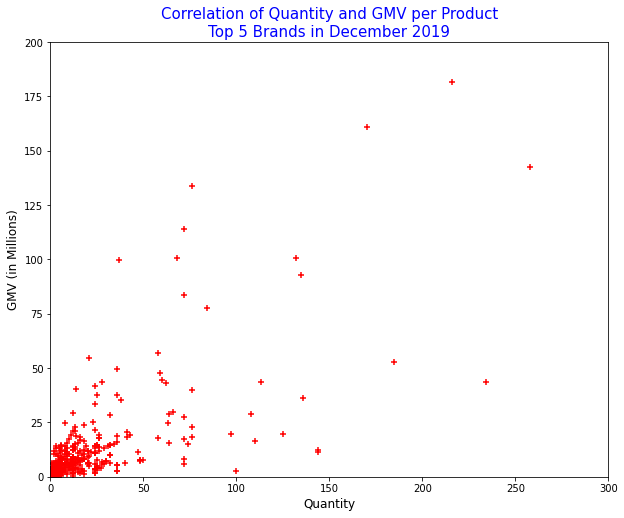

In [ ]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

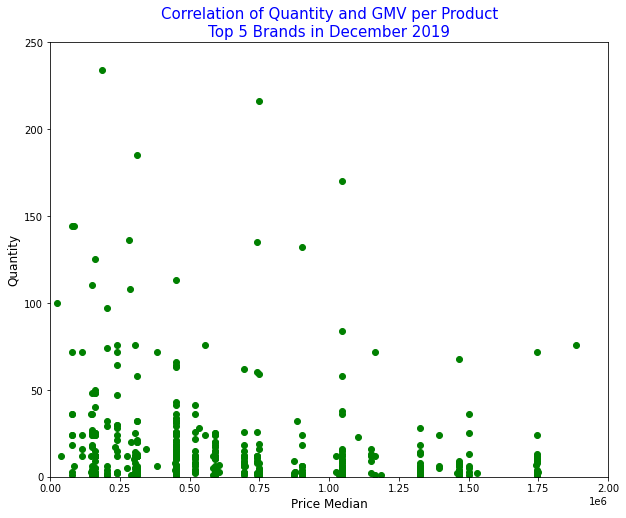

In [ ]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

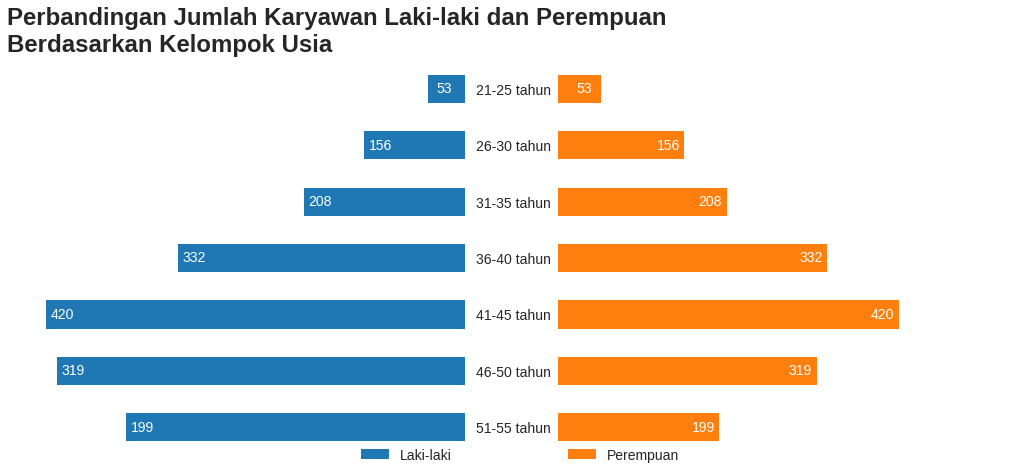

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("seaborn")

tabel = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv")
		.sort_values("Kelompok Usia", ascending=False)
		.set_index("Kelompok Usia")
		)
tabel["Laki-laki"] = -tabel["Laki-laki"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia",
			x=0, y=1.1, fontsize=24, fontweight='bold', ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550, 0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0, 550])
axes[0].set_ylabel("")
axes[0].set_xticklabels([""])
axes[0].set_yticklabels([""])
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].set_xticklabels([""])
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel['Laki-laki']), list(tabel['Perempuan'])):
	axes[0].annotate(str(abs(w)), (m+20, i), xytext=(m+20, i),
					color="w", va="center", ha="center", fontsize=14)
	axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20, i),
					color="w", va="center", ha="center", fontsize=14)
plt.tight_layout()
plt.show()

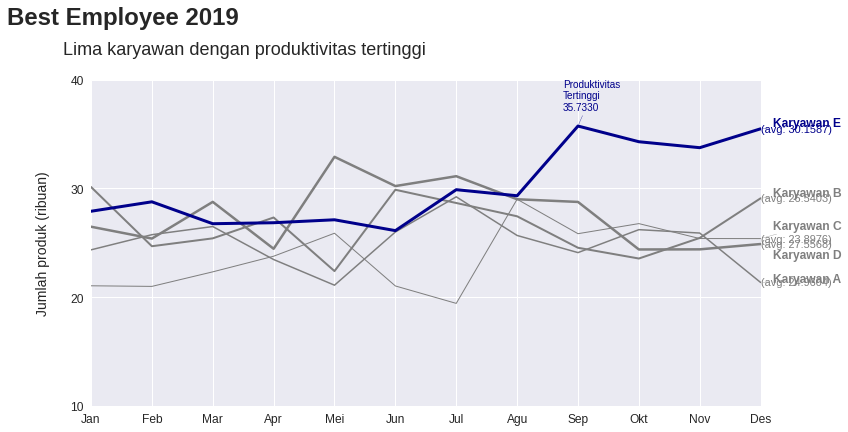

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.028, y=1.05, fontsize=24, fontweight='bold', ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
linewidths = [1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10, 40], color=colors,
xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3,  0.5, 1.2, -1.0,  0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
	item.set_linewidth(line_widths[i])
	lbl = item.get_label()
	ax.annotate(lbl, (11, tabel.loc["Desember", lbl]), (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
			   fontweight="bold", fontsize=12, color=colors[i], va="center", arrowprops={"arrowstyle": "-", "color": colors[i]})
	ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
			   fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\nTertinggi\n%.4f" % highest_prod, (8, highest_prod), (7.75, highest_prod+1.5),
		   ha="left", color=colors[i], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import plotnine as p9
from plotnine import *
import pandas as pd

In [ ]:
df_penduduk = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv')
df_inflasi = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/inflasi.csv')

In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TAHUN                 4806 non-null   int64  
 1   NAMA PROVINSI         4806 non-null   object 
 2   NAMA KABUPATEN/KOTA   4806 non-null   object 
 3   NAMA KECAMATAN        4806 non-null   object 
 4   NAMA KELURAHAN        4806 non-null   object 
 5   LUAS WILAYAH (KM2)    4806 non-null   float64
 6   KEPADATAN (JIWA/KM2)  4806 non-null   int64  
 7   JENIS KELAMIN         4806 non-null   object 
 8   RENTANG UMUR          4806 non-null   object 
 9   JUMLAH                4806 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 375.6+ KB


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


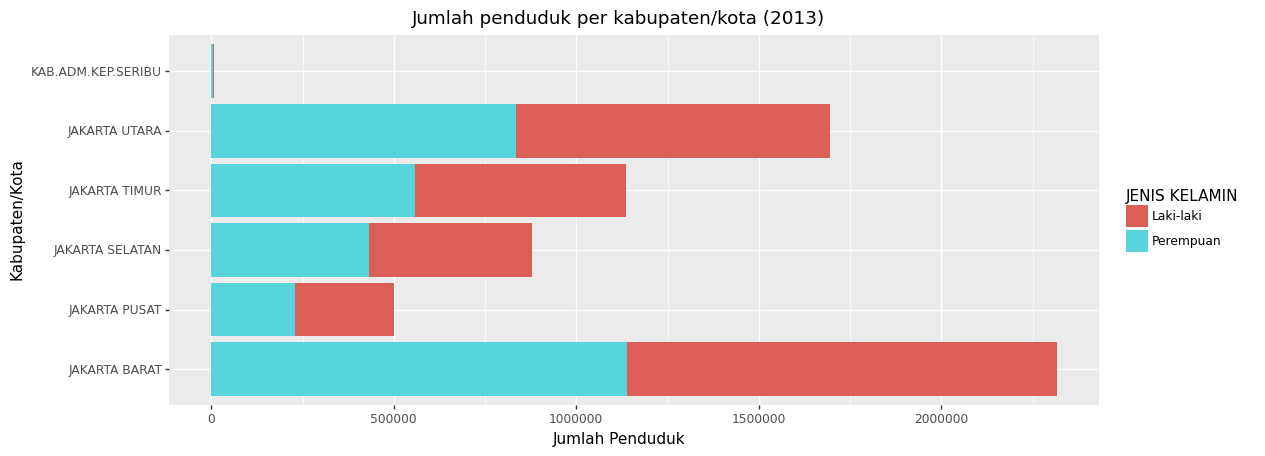

In [ ]:
p9.options.figure_size=(12, 4.8)
(ggplot(data=df_penduduk)+aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH', fill='JENIS KELAMIN')+geom_col()+coord_flip()
+labs(title='Jumlah penduduk per kabupaten/kota (2013)', x='Kabupaten/Kota', y='Jumlah Penduduk')).draw()
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


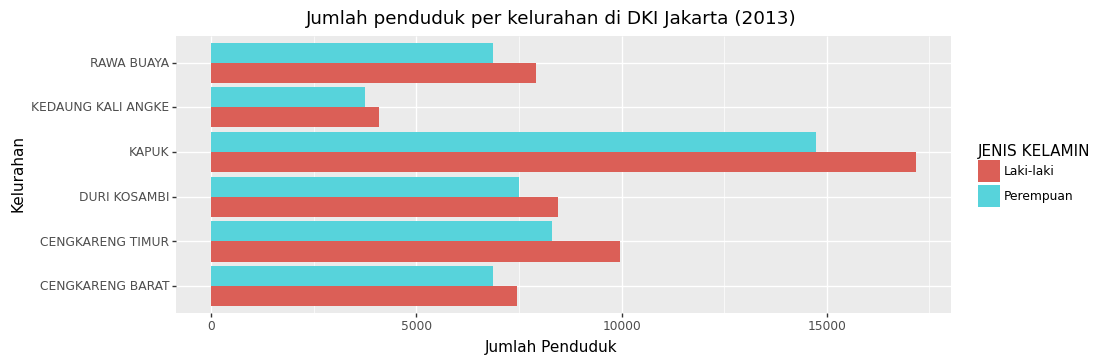

In [ ]:
p9.options.figure_size=(10, 3.6)
(ggplot(data=df_penduduk[df_penduduk['NAMA KECAMATAN'] == 'CENGKARENG'])
+ aes(x='NAMA KELURAHAN', y='JUMLAH', fill='JENIS KELAMIN')
+ geom_col(position='position_dodge')
+ coord_flip()
+ labs(title='Jumlah penduduk per kelurahan di DKI Jakarta (2013)',
x='Kelurahan',
y='Jumlah Penduduk')
).draw()
plt.show()

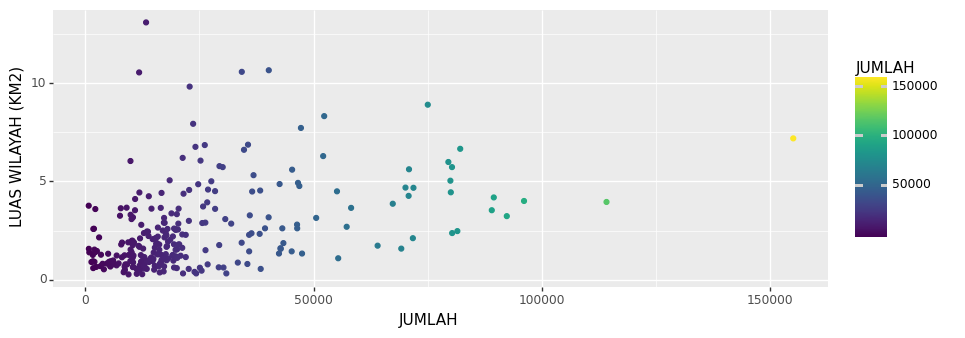

In [ ]:
df_penduduk_luas_jumlah = df_penduduk.groupby(['NAMA KELURAHAN', 'LUAS WILAYAH (KM2)'])[['JUMLAH']].agg('sum').reset_index()
(ggplot(data=df_penduduk_luas_jumlah)+aes(y='LUAS WILAYAH (KM2)', x='JUMLAH', color='JUMLAH')+geom_point()).draw()
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


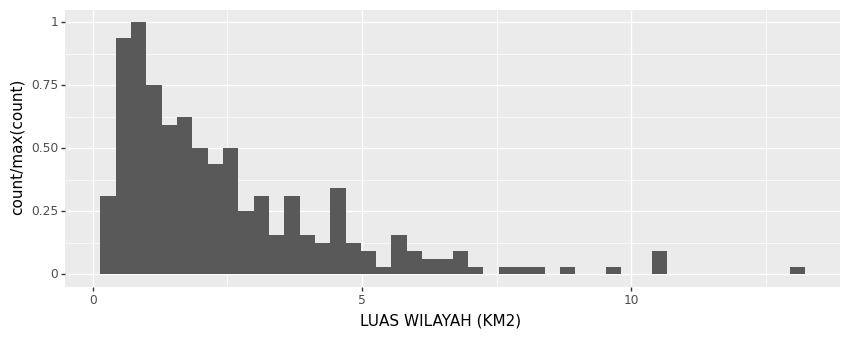

In [ ]:
(ggplot(data=df_penduduk)
+ aes(x='LUAS WILAYAH (KM2)', y='stat(count/max(count))')
+ geom_histogram()
).draw()
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


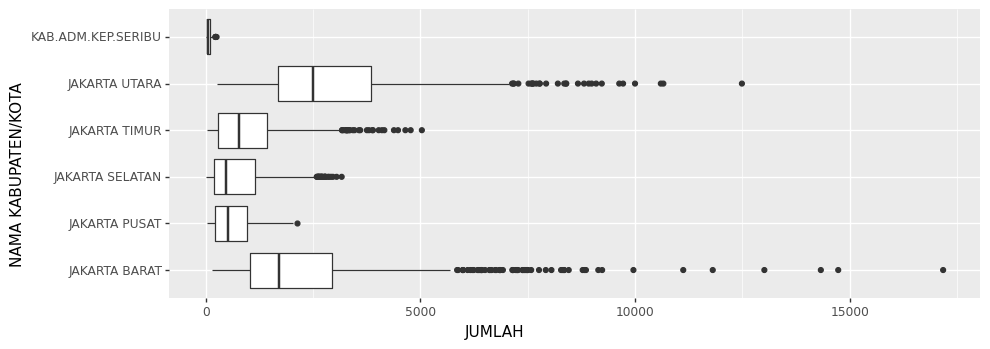

In [ ]:
(ggplot(data=df_penduduk)
+ aes(x='NAMA KABUPATEN/KOTA', y='JUMLAH')
+ geom_boxplot()
+ coord_flip()
).draw()
plt.tight_layout()
plt.show()

In [ ]:
df_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bulan    20 non-null     object 
 1   Negara   20 non-null     object 
 2   Inflasi  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


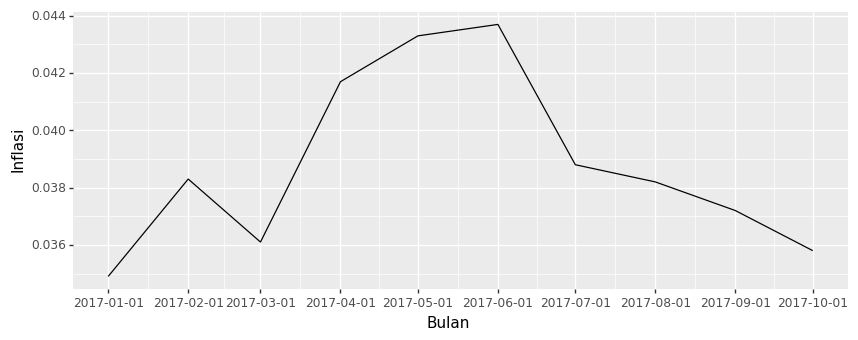

In [ ]:
df_inflasi['Bulan'] = pd.to_datetime(df_inflasi['Bulan'])
p9.options.figure_size=(10, 3.6)
(ggplot(data=df_inflasi[df_inflasi['Negara'] == 'Indonesia'])+aes(x='Bulan', y='Inflasi')+geom_line()).draw()
plt.show()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


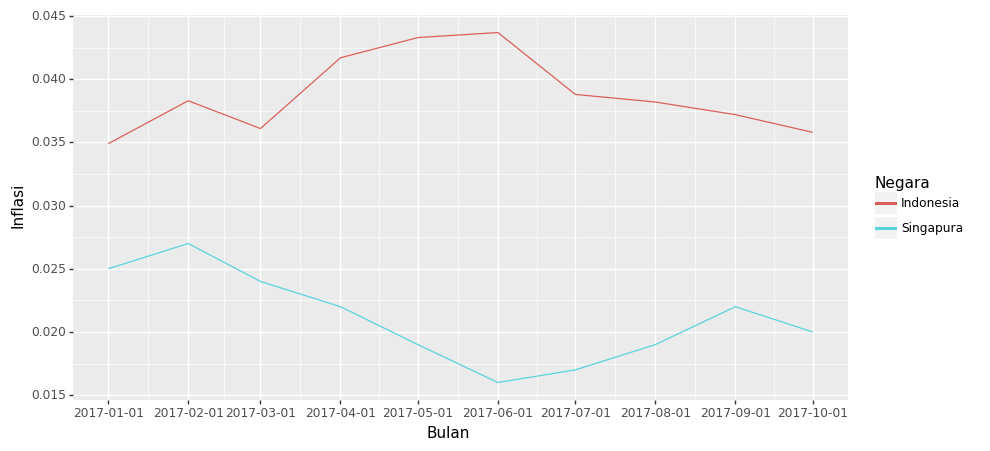

In [ ]:
(ggplot(data=df_inflasi)+aes(x='Bulan', y='Inflasi', color='Negara')+geom_line()+theme(figure_size=(10, 5))).draw()
plt.show()